In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.core import integer, empty, arange, asarray, roll
import cmath
import math
import random

6000


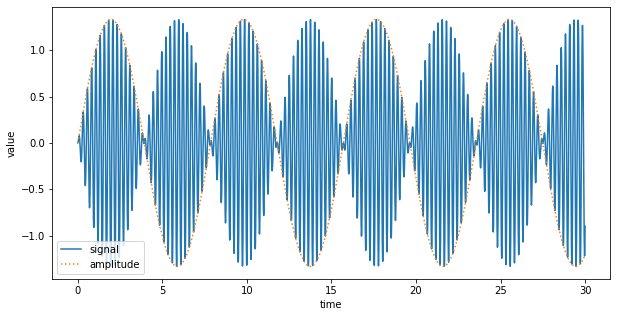

In [25]:
SAMPLE_RATE = 200
DURATION = 30
N = SAMPLE_RATE * DURATION
x = np.linspace(0, DURATION, N)
print(len(x))
ampl = np.sin(x * 0.8) / 0.75
#ampl2 = np.sin(ampl * 2) / 0.3
y = np.sin(x * 25) * ampl

plt.figure(figsize=(10,5))
plt.plot(x, y, label='signal')
plt.plot(x, ampl, ':', label='amplitude')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()

In [26]:
def dft(x):
  N, yr, yi = len(x), [], []
  for k in range(N):
    real, imag = 0, 0
    for n in range(N):
      theta = -k * (2 * math.pi) * (float(n) / N)
      real += x[n] * math.cos(theta)
      imag += x[n] * math.sin(theta)
    yr.append(real / N)
    yi.append(imag / N)
  return yr, yi

def idft(yr, yi):
  N, x = len(yr), []
  for n in range(N):
    real, imag = 0, 0
    for k in range(N):
      theta = k * (2 * math.pi) * (float(n) / N)
      real += (yr[k] * math.cos(theta)) - (yi[k] * math.sin(theta))
      # imag += (yr[k] * math.sin(theta)) + (yi[k] * math.cos(theta))
    x.append(real)
  return x

def fftfreq(n, d=1.0):
    val = 1.0 / (n * d)
    results = empty(n, int)
    N = (n-1)//2 + 1
    p1 = arange(0, N, dtype=int)
    results[:N] = p1
    p2 = arange(-(n//2), 0, dtype=int)
    results[N:] = p2
    return results * val

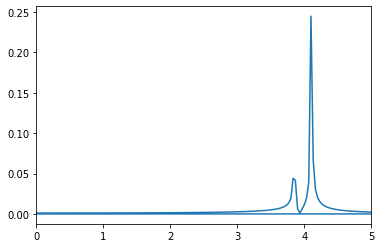

In [27]:
y_ft,yi_ft = dft(y)
x_ft = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(x_ft, np.abs(y_ft))
plt.xlim([0, 5])
plt.show()

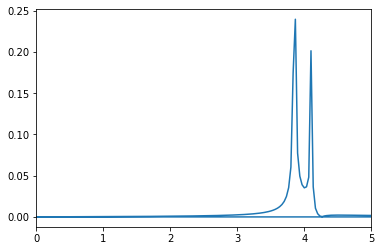

In [28]:
plt.plot(x_ft, np.abs(yi_ft))
plt.xlim([0, 5])
plt.show()

6000


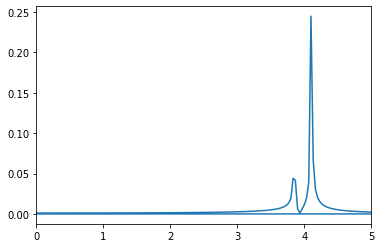

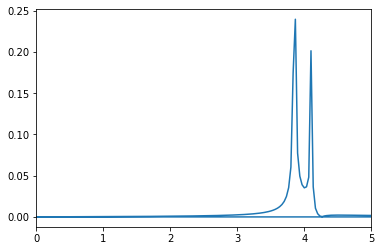

In [56]:
val_r = [0 for x in range(0,len(y_ft))]
val_i = [0 for x in range(0,len(yi_ft))]
print(len(yi_ft))
for i in range(0,len(y_ft)):
    val_r[i] = y_ft[i]
    val_i[i] = yi_ft[i]
    
# here you will perform hamming window or similar
    
plt.plot(x_ft, np.abs(val_r))
plt.xlim([0, 5])
plt.show()
plt.plot(x_ft, np.abs(val_i))
plt.xlim([0, 5])
plt.show()

In [57]:
new_sig = idft(val_r, val_i)

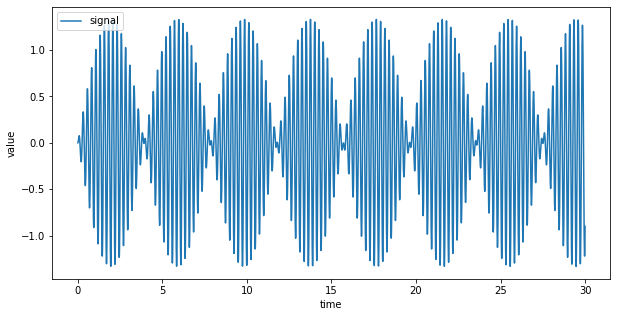

In [58]:
plt.figure(figsize=(10,5))
plt.plot(x, new_sig, label='signal')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()